## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.shape

(249, 5)

In [4]:
study_results.shape

(1893, 4)

In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
merge_df = study_results.merge(mouse_metadata, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
merge_df2 = study_results.merge(mouse_metadata, on="Mouse ID")
merge_df2.shape

(1893, 8)

In [8]:
merge_df.shape

(1893, 8)

In [9]:
merge_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [10]:
merge_df["Mouse ID"].value_counts()

g989    13
u364    10
o287    10
s508    10
s710    10
        ..
h428     1
u153     1
f932     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [11]:
# Checking the number of mice in the DataFrame.
mouselen = len(merge_df["Mouse ID"].unique())
mouselen

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dupl

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# df.drop(['Cochice', 'Pima'])

# df[df.name != 'Tina']

#drop = merge_df[merge_df.Mouse ID !="g989"]
#drop
#clean_df = merge_df.drop_duplicates(subset=["Mouse ID"], keep=False, inplace=True)
#clean_df


In [15]:
g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Checking the number of mice in the clean DataFrame.
check = len(merge_df["Mouse ID"].value_counts())
check


249

In [17]:
drug_gb = merge_df.groupby(["Drug Regimen"])
drug_gb

In [18]:
tumor_mean = drug_gb["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
tumor_median = drug_gb["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
tumor_variance = drug_gb["Tumor Volume (mm3)"].var()
tumor_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [21]:
tumor_stdv = drug_gb["Tumor Volume (mm3)"].std()
tumor_stdv

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
tumor_sem = drug_gb["Tumor Volume (mm3)"].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
sumtable_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_stdv, "Tumor Volume SEM": tumor_sem})
sumtable_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
sumtable_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_stdv, "Tumor Volume SEM": tumor_sem})
sumtable_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


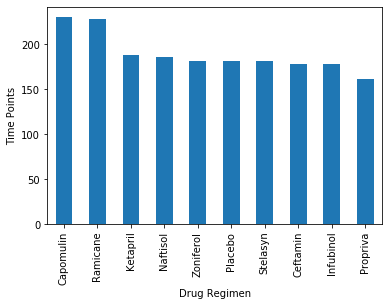

<Figure size 432x288 with 0 Axes>

In [34]:
barpandas = merge_df["Drug Regimen"].value_counts()
barpandas.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.show()
plt.tight_layout()


In [ ]:
#barx = merge_df["Drug Regimen"].value_counts()
#bary = merge_df["Timepoint"].value_counts()



In [ ]:
barpandas = merge_df[["Drug Regimen", "Timepoint"]]
barpandas = barpandas.set_index("Drug Regimen")
barpandas.head()

In [ ]:
#ax = barpandas.plot.bar(x="Drug Regimen", y="Timepoint", rot=0)
#ax

## Bar Plots

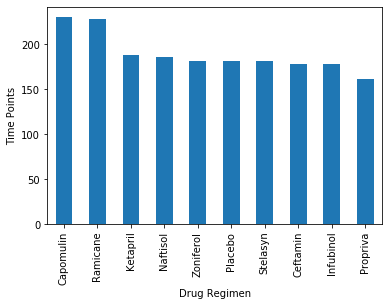

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
barpandas = merge_df["Drug Regimen"].value_counts()
barpandas.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.show()
plt.tight_layout()

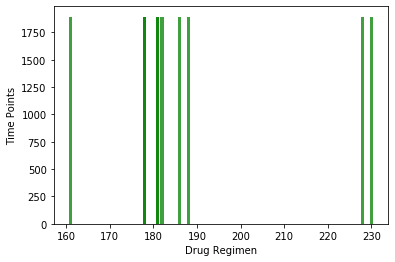

<Figure size 432x288 with 0 Axes>

In [44]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#x_axis = np.arange(len(merge_df["Drug Regimen"].value_counts()))
#tick_locations = [value for value in x_axis]
barpandas = merge_df["Drug Regimen"].value_counts()
bartime = merge_df["Timepoint"].count()
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.bar(barpandas, bartime, facecolor="green", alpha=0.75, align="center")
plt.show()
plt.tight_layout()

## Pie Plots

In [26]:
#g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
men = merge_df.loc[merge_df["Sex"] == "Male", :]
men.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.0,0,Ketapril,Male,15,29
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30


In [27]:
women = merge_df.loc[merge_df["Sex"] == "Female", :]
women.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
10,z234,0,45.0,0,Naftisol,Female,19,27
12,y260,0,45.0,0,Ketapril,Female,7,25


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
